In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
cr_data = pd.merge(city_data, ride_data, how = 'outer', on = 'city')

# Display the data table for preview
cr_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
#City Type (Urban, Suburban, Rural)
rural = cr_data[cr_data['type'] == 'Rural']
suburban = cr_data[cr_data['type'] == 'Suburban']
urban = cr_data[cr_data['type'] == 'Urban']

#Average Fare ($) Per City
rural_fare = rural.groupby(['city']).mean()['fare']
suburban_fare = suburban.groupby(['city']).mean()['fare']
urban_fare = urban.groupby(['city']).mean()['fare']

#Total Number of Rides Per City
rural_rides = rural.groupby(['city']).count()['ride_id']
suburban_rides = suburban.groupby(['city']).count()['ride_id']
urban_rides = urban.groupby(['city']).count()['ride_id']

#Total Number of Drivers Per City
rural_drivers = rural.groupby(['city']).mean()['driver_count']
suburban_drivers = suburban.groupby(['city']).mean()['driver_count']
urban_drivers = urban.groupby(['city']).mean()['driver_count']

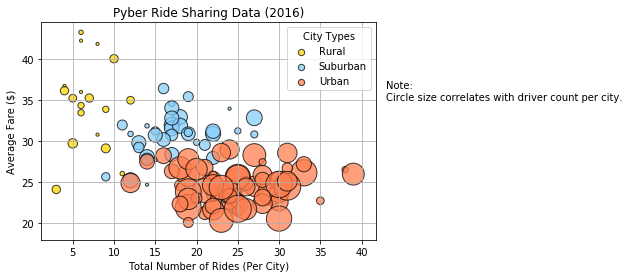

In [30]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
rural_plot = plt.scatter(rural_rides, rural_fare, s=10*rural_drivers,
           marker='o', c='gold', alpha=.75, edgecolors='black', label='Rural')
suburban_plot = plt.scatter(suburban_rides, suburban_fare, s=10*suburban_drivers,
           marker='o', c='lightskyblue', alpha=.75, edgecolors='black', label='Suburban')
urban_plot = plt.scatter(urban_rides, urban_fare, s=10*urban_drivers,
           marker='o', c='coral', alpha=.75, edgecolors='black', label='Urban')

# Incorporate the other graph properties
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.grid(True)

# Create a legend
scatter_legend = plt.legend(loc='best', title='City Types', mode='Expanded', labelspacing=0.5, fontsize='medium')
scatter_legend.legendHandles[0]._sizes = [40]
scatter_legend.legendHandles[1]._sizes = [40]
scatter_legend.legendHandles[2]._sizes = [40]

# Incorporate a text label regarding circle size
plt.text(43, 35, u'Note: \nCircle size correlates with driver count per city.')

# Save Figure
plt.savefig('figures/bubble_plot.png')

## Total Fares by City Type

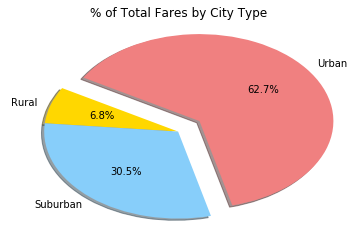

In [29]:
# Calculate Type Percents
type_perc = cr_data.groupby(['type']).sum()['fare']/cr_data['fare'].sum()

# Build Pie Chart
explode = (0, 0, .2)

plt.pie(type_perc, explode=explode, labels=['Rural', 'Suburban', 'Urban'], 
        colors=['gold', 'lightskyblue', 'lightcoral'], autopct="%1.1f%%", 
        shadow=True, startangle=150)

plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('figures/pie_fares.png')

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

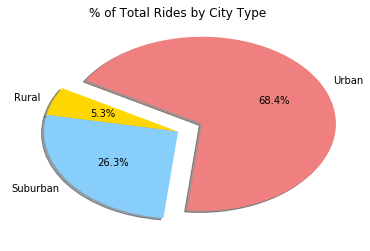

In [18]:
# Calculate Ride Percents
type_perc = cr_data.groupby(['type']).count()['ride_id']/cr_data['ride_id'].count()

# Build Pie Chart
plt.pie(type_perc, explode=explode, labels=['Rural', 'Suburban', 'Urban'], 
        colors=['gold', 'lightskyblue', 'lightcoral'], autopct="%1.1f%%", 
        shadow=True, startangle=150)

plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('figures/pie_rides.png')

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

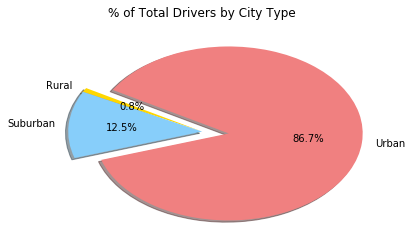

In [21]:
# Calculate Driver Percents
type_perc = cr_data.groupby(['type']).sum()['driver_count']/cr_data['driver_count'].sum()

# Build Pie Chart
plt.pie(type_perc, explode=explode, labels=['Rural', 'Suburban', 'Urban'], 
        colors=['gold', 'lightskyblue', 'lightcoral'], autopct="%1.1f%%", 
        shadow=True, startangle=150)

plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig('figures/pie_drivers.png')